**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 02

**Datos de la entrega:** Domingo 12 de setiembre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Eduardo Madrigal
- Gabriel Vargas






# Parte 1.  Series temporales y graficación  (52 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos 1 a 6 (los tres primeros capítulos ya los había estudiado en otro trabajo). Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'daily-max-temperatures.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.


In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [77]:
# loads file as a pd Series, not a DataFrame
series = pd.read_csv('data/daily-max-temperatures.csv', header = 0, parse_dates = [0], index_col = 0,
                    squeeze = True)
print(series.head(5), end = '\n\n') # shows first 5 registers
print(type(series)) # shows data type for series

Date
1981-01-01    38.1
1981-01-02    32.4
1981-01-03    34.5
1981-01-04    20.7
1981-01-05    21.5
Name: Temperature, dtype: float64

<class 'pandas.core.series.Series'>


### 1.2
- Muestra el promedio y la desviación estándar de los datos

In [78]:
print('Promedio: ', series.mean())
print('Desviación estándar: ', series.std())

Promedio:  20.009150684931505
Desviación estándar:  6.108353282275072


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [79]:
from pandas import DataFrame
from calendar import month_abbr # solo para display de los resultados

# grouping by month and calculating mean temperature
months_mean = series.groupby(by=[series.index.month]).mean() 

# display changes
months_mean.rename(index=(lambda i : month_abbr[i]), inplace=True) #changes index values to month abbreviations
months_mean.rename_axis("Month", inplace=True) # changes index label
months_mean.rename("Mean temperature", inplace=True) # changes series name/label

print(months_mean)

Month
Jan    25.602581
Feb    26.151064
Mar    24.220968
Apr    20.889333
May    17.447419
Jun    14.240333
Jul    13.651935
Aug    15.296774
Sep    17.246667
Oct    19.719355
Nov    22.222667
Dec    23.824675
Name: Mean temperature, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [80]:
from pandas import concat

# creates a dataframe using only the temperature values
# datetime values are not used, yet the time order is maintained
temperatures = DataFrame(series.values)

# Lag = 3 seen because the last 3 values are used to predict the next one
temperatures = concat([temperatures.shift(3), temperatures.shift(2), temperatures.shift(1), temperatures], axis=1)
temperatures.columns = ['t-2', 't-1', 't', 't+1'] # rename columns for clarity
print(temperatures)

       t-2   t-1     t   t+1
0      NaN   NaN   NaN  38.1
1      NaN   NaN  38.1  32.4
2      NaN  38.1  32.4  34.5
3     38.1  32.4  34.5  20.7
4     32.4  34.5  20.7  21.5
...    ...   ...   ...   ...
3645  23.3  29.3  20.9  37.6
3646  29.3  20.9  37.6  23.2
3647  20.9  37.6  23.2  25.1
3648  37.6  23.2  25.1  24.4
3649  23.2  25.1  24.4  24.6

[3650 rows x 4 columns]


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [81]:
# creates a dataframe using only the temperature values
# datetime values are not used, yet the time order is maintained
temperatures = DataFrame(series.values)

window_width = 2
shift_temps = temperatures.shift(window_width-1) # for t+1 values
window = shift_temps.rolling(window = window_width) # window_width = 2

# adds statistics and values to the dataframe
# mean, min and max are calculated for t-1 and t (specified window)
stats_temp = concat([window.min(), window.mean(), window.max(), temperatures], axis=1)  
stats_temp.columns = ['min', 'mean', 'max', 't+1'] # column names for clarity

print(stats_temp)

       min   mean   max   t+1
0      NaN    NaN   NaN  38.1
1      NaN    NaN   NaN  32.4
2     32.4  35.25  38.1  34.5
3     32.4  33.45  34.5  20.7
4     20.7  27.60  34.5  21.5
...    ...    ...   ...   ...
3645  20.9  25.10  29.3  37.6
3646  20.9  29.25  37.6  23.2
3647  23.2  30.40  37.6  25.1
3648  23.2  24.15  25.1  24.4
3649  24.4  24.75  25.1  24.6

[3650 rows x 4 columns]


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

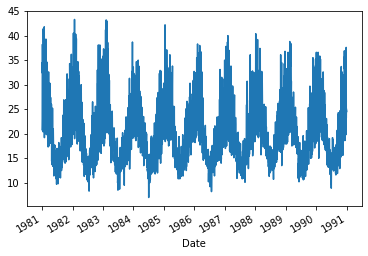

In [82]:
series.plot() # series dataframe from 1.1
plt.show()

- Pareciera existir un patrón de temporalidad (seasonality), donde las mayores temperaturas se dan a principio de año y de ahí comienzan a bajar hasta llegar a las más bajas a mediados de año. Pasado medio año, las temperaturas vuelven a comenzar a elevarse. Este patrón es constante.
- También se puede resaltar que el gráfico es más denso entre los 20 y 30 grados, lo cual indica que la media de temperatura puede encontrarse en este rango.

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

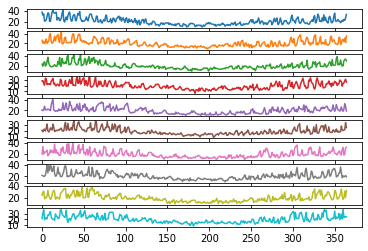

In [83]:
from pandas import Grouper # as TimeGrouper is deprecated

groups = series.groupby(Grouper(freq='A')) # groups data (from 1.1) by year (Annual)
years = DataFrame() # data frame for divided data

# values are placed in the dataframe, divided by year
for name, group in groups:
    years[name.year] = group.values
    
years.plot(subplots=True, legend=False)
plt.show()

- Cada año, las temperaturas son más bajas y constantes a mediados de año, entre los días 100-250 aproximadamente. 
- Las temperaturas más altas se dan en los primeros 100 días y los últimos 65 días (300-365). 
    - En estos rangos de principio y fin de año, las temperaturas también fluctúan más.

### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


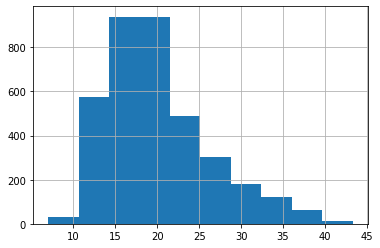

In [84]:
series.hist() # dataframe from 1.1
plt.show()

- La temperatura no parece seguir una distribución gaussiana, pues no es uniforme y tiene muchos más valores a la derecha de la media. 
    - La distribución parece ser asimétrica
- Podemos ver que la media de la temperatura se encuentra entre 15 y 20 grados

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


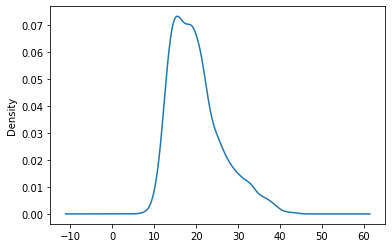

In [85]:
series.plot(kind = 'kde') # dataframe from 1.1
plt.show()

- Los valores no parecen seguir una distribución gaussiana, pues se ve muy puntiagudo el gráfico
- Sigue una distribución asimétrica, pues se ve más densa a la derecha de la media

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

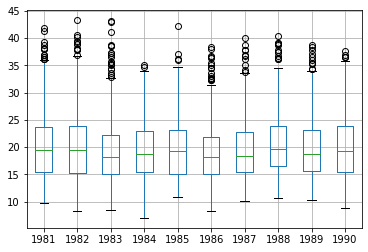

In [86]:
years.boxplot() # creates boxplot from years dataframe (see 1.7)
plt.show()

### Interpretación
- Bigotes: Línea inferior y superior que delimita los límites para detectar valores atípicos.
- Valores Atípicos: Círculos que representan valores muy alejados de la media de los datos. 
- Caja: Rectangulo que representa el primer cuartil con su lado inferior, la mediana con la línea que lo divide (verde) y tercer cuartil con su lado superior.

### Conclusiones
- La mediana y los cuartiles inferiores y superiores no fluctuan mucho, encontrándose siempre entre 17-19, 15-16 y 23-24 grados respectivamente. El primer cuartil (inferior) es casi constante en 15 grados. 
- El límite inferior no fluctúa mucho de año a año, teniendo un rango entre los 8-11 grados. El límite superior fluctúa un poco más, estando entre 32-36 grados.
- Hay muchas temperaturas elevadas que se salen de lo normal. (Valores atípicos)
- La temperatura máxima cambia mucho de año a año. 

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


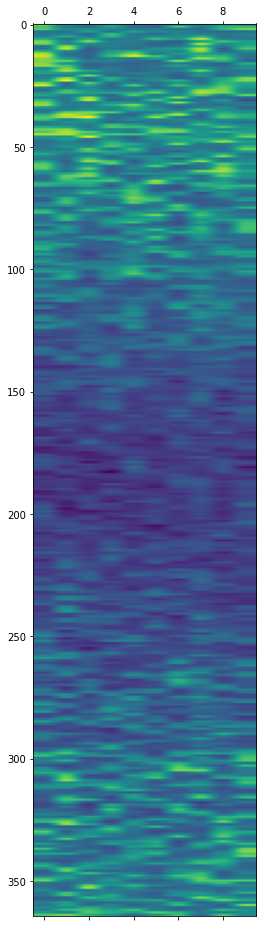

In [87]:
# years.T can be used to show the transpose of the matrix
plt.matshow(years, interpolation=None, aspect='auto') # creates heatmap from years dataframe (see 1.7)
plt.show()

### Interpretation
- Matrix of numbers where
    - Column: year
    - Row: day of year
- Each cell of the matrix has a value, which is represented as a colour. In this case, the value is the temperature
- The higher the value, the 'warmer' the colour

### Conclusions
- Highest temperatures are found in the first 50 days of each year
- Lowest temperatures are found between days 150-200
- Temperatures are the highest in the first 50, then start dropping until day 200 approx, when they start to rise again. Temperatures rise considerably during the last 60 days of the year

### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


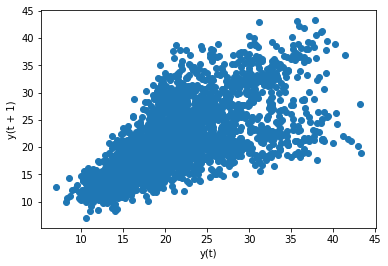

In [88]:
from pandas.plotting import lag_plot # pandas.tools is deprecated

lag_plot(series) # data frame from 1.1
plt.show()

### Interpretation
- x-axis: Temperatures for time t
- y-axis: Temperatures for time t-1 (a greater lag could be used)
- One can look at the correlation between the points to determine if there is any relationship between value at t and other values at a previous time

### Conclusion
- There is a moderate positive correlation between the temperature at at t and temperatures at t-1, since points move from lower left to upper right corner. 
- At higher temperatures, one can see that data is a little more scattered, which suggests that the correlation is not as strong

### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


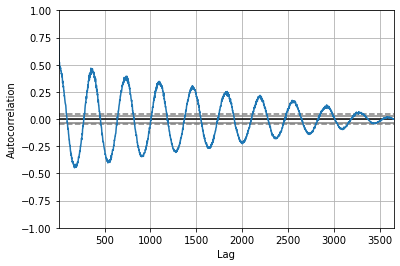

In [89]:
from pandas.plotting import autocorrelation_plot # pandas.tools is deprecated

autocorrelation_plot(series) # data frame from 1.1
plt.show()

### Interpretation
- The graph quantifies type and strength of relationships between observations and their lag
- The closer the value is to |1|, the stronger the correlation. The closer to 0, the weaker the correlation
- Correlation values above/below (depending of sign of number) dotted lines are statistically significant
- If the graph looks like a sine wave, it is an indication of seasonality in the data

### Conclusion
- Correlation tends towards insignificance with higher lags, which means that a high lag is probably not a good idea for a model
- The sine-wave-like graph indicates seasonality in the data

# Parte 2.  Diferenciación  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'yearly-water-usage.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

In [90]:
# loads file as a pd Series, not a DataFrame
series = pd.read_csv('data/yearly-water-usage.csv', header = 0, parse_dates = [0], index_col = 0,
                    squeeze = True)

print(series.head(4)) # shows first 4 registers

Year
1885-01-01    356
1886-01-01    386
1887-01-01    397
1888-01-01    397
Name: Water, dtype: int64


### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

In [91]:
from statsmodels.tsa.stattools import adfuller

# Function to carry out the Augmented Dickey-Fuller test
def adf_test(X):
    adf_results = adfuller(X) # applies the Augmented Dickey-Fuller test

    # Prints results to Augmented Dickey-Fuller test
    adf_statistic = adf_results[0]
    print('ADF statistic: ', adf_statistic)
    print('p-value: ', adf_results[1])
    print('Critical values analysis: ')

    # Applies test with critical values using an alpha = 0.05
    cval = adf_results[4]['5%']
    if cval < adf_results[0]:
        print(f'{cval} < {adf_statistic} --> Accept H0, time series is non-stationary')
    else:
        print(f'{cval} >= {adf_statistic} --> Reject H0, time series is stationary')

In [92]:
# Extracts water usage values from series, ignoring timestamps but maintaining time order
X = series.values # series from 2.1

# Tests the data with the Augmented Dickey-Fuller test
adf_test(X)

ADF statistic:  -2.07708745040519
p-value:  0.2538270887941573
Critical values analysis: 
-2.9003945086747343 < -2.07708745040519 --> Accept H0, time series is non-stationary


### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

In [93]:
from numpy import log

# applies first difference to time series
# https://www.statistics.com/glossary/differencing-of-time-series/
#dif_series = series.copy()
#for i in range(series.size):
#    dif_series[i] = series[i]-series[i-1]

# foo for differencing. Leaves NA in the first row.
dif_series = series.diff()
# removes first row that can't be differenced
dif_series.dropna(inplace=True)

# applies adf test to differentiated series
adf_test(dif_series)

ADF statistic:  -6.693247596954763
p-value:  4.059380122723346e-09
Critical values analysis: 
-2.9003945086747343 >= -6.693247596954763 --> Reject H0, time series is stationary


### 2.4

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

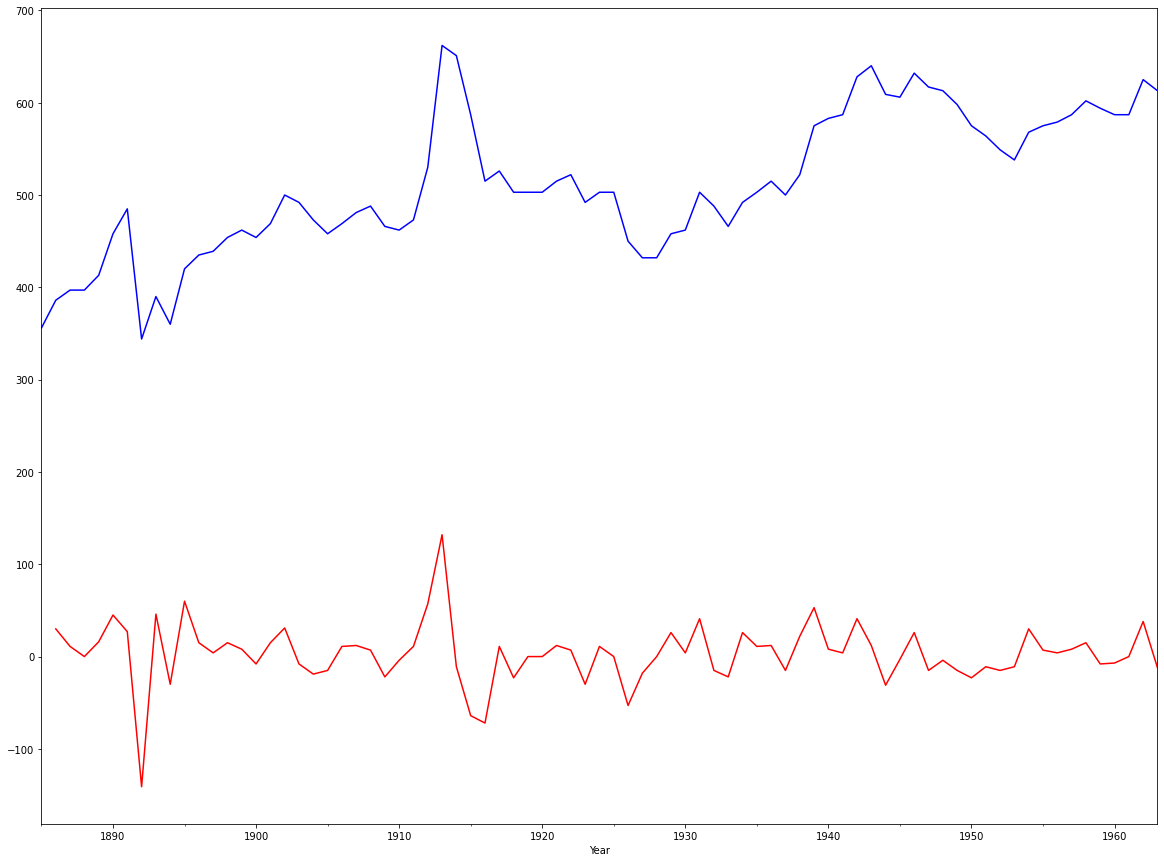

In [94]:
plt.figure(figsize=(20,15)) # sets size for graph
series.plot(color='blue') # plots original series in blue
dif_series.plot(color='red') # plots differenced series in red
plt.show()

### 2.5

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


Both time series have peaks and troughs, yet:
- Values seem to be increasing with time in the original time series (ie. values get bigger each year) (trend)
- Values remain constant with time in the diferenciated time series. In other words, values remain within the same range every year (between -100 and 50 approximately)

# Parte 3.  Regresión lineal y breve diseño experimental  (28 puntos)

Se le suministra un archivo llamado daily-max-temperatures.csv.

### 3.1
- Cargue el archivo.
- Muestre cuántas filas tiene el conjunto de datos.
- Revise si la serie es o no estacionaria. Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05). Y haga la diferenciación en caso de ser no estacionaria.


In [95]:
# loads file in a Series
series = pd.read_csv('data/daily-max-temperatures.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True)

print("Number of rows: ", series.size, end='\n\n')
print("Checking Stationarity: ")
adf_test(series)

Number of rows:  3650

Checking Stationarity: 
ADF statistic:  -4.6037030284468905
p-value:  0.00012715478116457116
Critical values analysis: 
-2.8623365480522964 >= -4.6037030284468905 --> Reject H0, time series is stationary


### 3.2
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=30
- Utilice dropna() para borrar cualquier fila con NA
- Muestre la primera fila.

Se podrá ver algo así:

    t-29  t-28  t-27  t-26  t-25  t-24  t-23  t-22  t-21  t-20  ...   t-8  \
30  38.1  32.4  34.5  20.7  21.5  23.1  29.7  36.6  36.1  20.6  ...  21.7   

     t-7   t-6   t-5   t-4   t-3   t-2   t-1     t   t+1  
30  22.9  26.2  36.5  41.8  21.5  19.2  25.0  28.9  23.2  

[1 rows x 31 columns]

In [96]:
# creates dataframe with only temperature values (keeping same order)
temperatures = DataFrame(series.values)
lag = 30

lagged_temperatures = temperatures.copy() # resulting dataFrame
# concatenating initial columns 
columns_names = ['t','t+1']
lagged_temperatures = pd.concat([temperatures.shift(1), lagged_temperatures], axis=1)

# concats each remaining shifted column 
for shift_num in range(2, lag+1):
    temp = temperatures.shift(shift_num)
    lagged_temperatures = pd.concat([temp, lagged_temperatures], axis=1)
    columns_names.insert(0,'t-'+str(shift_num-1))

# Rename columns for clarity
lagged_temperatures.columns = columns_names
# Removes rows with NA
lagged_temperatures.dropna(inplace=True)

print(lagged_temperatures.head(1))

    t-29  t-28  t-27  t-26  t-25  t-24  t-23  t-22  t-21  t-20  ...   t-8  \
30  38.1  32.4  34.5  20.7  21.5  23.1  29.7  36.6  36.1  20.6  ...  21.7   

     t-7   t-6   t-5   t-4   t-3   t-2   t-1     t   t+1  
30  22.9  26.2  36.5  41.8  21.5  19.2  25.0  28.9  23.2  

[1 rows x 31 columns]


### 3.3
- Divida entre X e y.
- Escale X utilizando MinMaxScaler. 
- Agregue como primer columna el bias (llena de 1's).
- Muestre los tres primeros registros.

In [100]:
print(lagged_temperatures[1][0])

KeyError: 1

### 3.4
- Divida entre train y test (tanto X como y).
- Utilice 70% train y 30% test, modo aleatorio.


### 3.5

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando from sklearn.linear_model import LinearRegression, y la división anterior en train y test. Ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$. 


### 3.6

- En esta parte vamos a probar los conceptos de  tran/validation/test y cross-validation.
- Usando KFold y regresión Ridge, prepare un diseño experimental con 80% para el cross-validation y 20% para el test (distribución de manera aleatoria), con 5 folds. 
- La idea es encontrar el mejor valor para el hiperparámetro alfa en el modelo (factor de regularización). 
- Muestre los resultados obtenidos y coméntelos (mismas métricas $R2$ y $MSE$ ).


### 3.7

- Analice cómo se comporta no solo el promedio, sino la desviación estándar.